# COLLECTING SENSITIVE WORDS FROM SNOMED-CT AND WIKIPEDIA

In [36]:
import wikipedia #library to get wikipedia information about given words
import spacy #for nlp programming
from wordcloud import WordCloud #for wordcloud representation

sensitive_diseases=['AIDS','HIV','TB','CANCER','BIPOLAR','MENTAL-DISORDER','BRAIN TUMOR'] #senstive diseases name
sensitive_drugs = ['Abacavir','Didanosine','Emtricitabine','Lamivudine','Stavudine','Tenofovir','Zidovudine','Isoniazid','Rifampicin','Pyrazinamide','Ethambutol','RisPeridone','Olanzapine','Quetiapine','ziprasidone','paliperidone','lurasidone','afinitor','avastin','bevacizumab','bicnu','carmustine','everolinus','colozapine','AC-T'] #sensitive drugs name

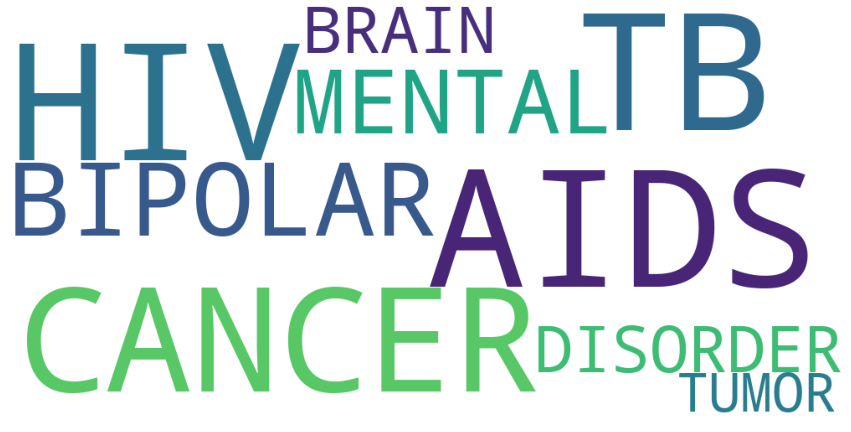

In [37]:
import matplotlib.pyplot as plt #to plot world cloud in thus cell this library is required

#convert list to string and generate
unique_string=(" ").join(sensitive_diseases) 

wordcloud = WordCloud(width = 1000, height = 500,background_color="white").generate(unique_string)#MAKE WORD CLOUD
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

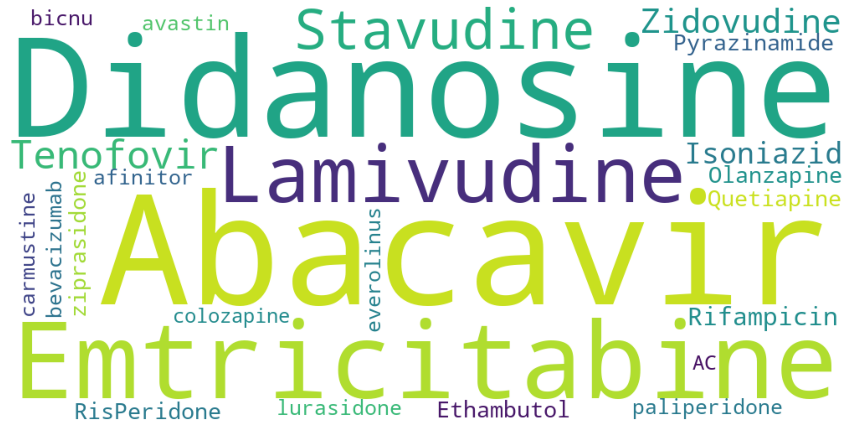

In [38]:
import matplotlib.pyplot as plt

#convert list to string and generate
unique_string=(" ").join(sensitive_drugs)
wordcloud = WordCloud(width = 1000, height = 500,background_color="white").generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [39]:
%%time
import pymedtermino
pymedtermino.LANGUAGE = "en"
pymedtermino.REMOVE_SUPPRESSED_CONCEPTS = True
from pymedtermino.all import *
from pymedtermino import *

from pymedtermino.snomedct import *
import wikipedia

snomed_senstive_info = []
for item in sensitive_diseases:
    info = SNOMEDCT.search(item)
    snomed_senstive_info.append(info)
    
snomed_senstive_drug_info = []
for item in sensitive_drugs :
    info = SNOMEDCT.search(item)
    snomed_senstive_drug_info.append(info)

#print(snomed_senstive_drug_info)



all_snomed_senstive_info=[]
for term in snomed_senstive_info:
    for term1 in term:
        all_snomed_senstive_info.append(term1)
#all_snomed_senstive_info     

all_snomed_senstive_drug_info=[]
for term in snomed_senstive_drug_info:
    for term1 in term:
        all_snomed_senstive_drug_info.append(term1)
#print(all_snomed_senstive_drug_info)  


import re
string = ' '.join([str(elem) for elem in all_snomed_senstive_info])

result1 = re.split(r"#|\n",string.lower())

result1
result2=[]
for i in result1:
    res=re.findall(r"^ snomedct\[[0-9]+\]  |^snomedct\[[0-9]+\]  ",i)#mached snomedct word
    result2.append(res)
result2
result3=[ele for ele in result2 if ele!=[]]#remove empty list
result4=[]
for i in result3:
    for item in i:
        result4.append(item)#make ito a single list

#print(result4)
result5=[]
for j in result1:
    if j not in result4:
        result5.append(j.strip())#extracting other then snomedct word and number
#print(result5)
result5=' '.join([str(elem) for elem in result5])
result6=re.split(r"\(|\)", result5)#
#print(result6)

result7 = re.split(r"\(|\)",string)

#print(result7)
result1
result8=set()
for i in result7:
    if '\n' not in i:
        result8.add(str(i).lower())

result9=[]
for i in result8:
    res=re.findall(r"^(?!snomedct*).+",i)#mached snomedct word
    result9.append(res)
#print(result9)
result10=[]
for i in result9:
    for j in i:
        if j !=[''] and j !=' ' and j!='':
            result10.append(j)


snomed_reduced_final_result=[]
for i in result6:
    if i not in result10:
        snomed_reduced_final_result.append(i.strip())
#print(snomed_reduced_final_result)



import re
string = ' '.join([str(elem) for elem in all_snomed_senstive_drug_info])
#type(result1)
result1 = re.split(r"#|\n",string.lower())

#print(result1)
result2=[]
for i in result1:
    res=re.findall(r"^ snomedct\[[0-9]+\]  |^snomedct\[[0-9]+\]  ",i)#mached snomedct word
    result2.append(res)
result2
result3=[ele for ele in result2 if ele!=[]]#remove empty list
result4=[]
for i in result3:
    for item in i:
        result4.append(item)#make ito a sinle list

result4
result5=[]
for j in result1:
    if j not in result4:
        result5.append(j.strip())
#result5
result5=' '.join([str(elem) for elem in result5])
result6=re.split(r"\(|\)", result5)
result6

result7 = re.split(r"\(|\)",string)
#result1.group(0)
result1
result8=set()
for i in result7:
    if '\n' not in i:
        result8.add(str(i).lower())

result9=[]
for i in result8:
    res=re.findall(r"^(?!snomedct*).+",i)#mached snomedct word
    result9.append(res)

result10=[]
for i in result9:
    for j in i:
        if j !=[''] and j !=' ' and j!='':
            result10.append(j)


snomed_reduced_final_drug_result=[]
for i in result6:
    if i not in result10:
        snomed_reduced_final_drug_result.append(i.strip())
snomed_reduced_final_drug_result




import wikipedia
wikipedia_senstive_info = []
for item in sensitive_diseases:
    info = wikipedia.search(item)
    wikipedia_senstive_info.append(info)
#wikipedia_senstive_info

wikipedia_senstive_drug_info = []
for item in sensitive_drugs:
    info = wikipedia.search(item)
    wikipedia_senstive_drug_info.append(info)
#print(wikipedia_senstive_drug_info)





all_wikipedia_senstive_info=[]
for term in wikipedia_senstive_info:
    for term1 in term:
        all_wikipedia_senstive_info.append(term1)
all_wikipedia_senstive_info
for i in range(len(all_wikipedia_senstive_info)):
    all_wikipedia_senstive_info[i] = all_wikipedia_senstive_info[i].lower()



all_wikipedia_senstive_drug_info=[]
for term in wikipedia_senstive_drug_info:
    for term1 in term:
        all_wikipedia_senstive_drug_info.append(term1)
all_wikipedia_senstive_drug_info
for i in range(len(all_wikipedia_senstive_drug_info)):
    all_wikipedia_senstive_drug_info[i] = all_wikipedia_senstive_drug_info[i].lower()



final_sensitive_info_list = all_wikipedia_senstive_info + snomed_reduced_final_result
final_drug_list = all_wikipedia_senstive_drug_info + snomed_reduced_final_drug_result

final_sensitive_list = final_sensitive_info_list + final_drug_list


print(final_sensitive_list)

['hiv/aids', 'history of hiv/aids', 'timeline of hiv/aids', 'epidemiology of hiv/aids', 'list of hiv-positive people', 'hiv/aids denialism', 'hiv/aids in the united states', 'list of countries by hiv/aids adult prevalence rate', 'aids (disambiguation)', 'hiv/aids in africa', 'hiv', 'hiv/aids', 'epidemiology of hiv/aids', 'subtypes of hiv', 'hiv superinfection', 'list of hiv-positive people', 'timeline of hiv/aids', 'history of hiv/aids', 'list of countries by hiv/aids adult prevalence rate', 'signs and symptoms of hiv/aids', 'tb', 'tuberculosis', 'socata tb family', 'multidrug-resistant tuberculosis', 't. b. joshua', 'directly observed treatment, short-course', 'tupolev tb-3', 'tuberculosis radiology', 'roland tb-303', 'north american b-25 mitchell', 'cancer', 'colorectal cancer', 'pancreatic cancer', 'lung cancer', 'breast cancer', 'cancer (astrology)', 'prostate cancer', 'esophageal cancer', 'skin cancer', 'not cancer', 'bipolar disorder', 'bipolar', 'bipolar ii disorder', 'bipolar j

In [40]:
%%time
import pymedtermino
pymedtermino.LANGUAGE = "en"
pymedtermino.REMOVE_SUPPRESSED_CONCEPTS = True
from pymedtermino.all import *
from pymedtermino import *

from pymedtermino.snomedct import *
import wikipedia



CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 76.8 µs


# PREPROCESSING OF A DOCUMENT

In [41]:
%%time
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation #special character
from autocorrect import spell

snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

class Preprocess:
    def __int__(self):
        pass

    def autospell(self,text):
       
        #correct the spelling of the word.
       
        spells = [spell(w) for w in (nltk.word_tokenize(text))]
        return " ".join(spells)

    def to_lower(self,text):
        
       # :param text:
        #:return:
         #   Converted text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
        
        return text.lower()

    def remove_numbers(self,text):
        
        #take string input and return a clean text without numbers.
       # Use regex to discard the numbers.
        
        output = ''.join(c for c in text if not c.isdigit())
        return output

    def remove_punct(self,text):
      
        #take string input and clean string without punctuations.
        #use regex to remove the punctuations.
       
        return ''.join(c for c in text if c not in punctuation)

    def remove_Tags(self,text):
        
        #take string input and clean string without tags.
        #use regex to remove the html tags.
        
        cleaned_text = re.sub('<[^<]+?>', '', text)
        return cleaned_text

    def sentence_tokenize(self,text):
       
        #take string input and return list of sentences.
       # use nltk.sent_tokenize() to split the sentences.
        
        sent_list = []
        for w in nltk.sent_tokenize(text):
            sent_list.append(w)
        return sent_list

    def word_tokenize(self,text):
        
        #:param text:
        #:return: list of words
       
        return [w for sent in nltk.sent_tokenize(text) for w in nltk.word_tokenize(sent)]

    def remove_stopwords(self,sentence):
    
        #removes all the stop words like "is,the,a, etc."
      
        stop_words = stopwords.words('english')
        return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

    def stem(self,text):
       
        #:param word_tokens:
        #:return: list of words
        
        stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return " ".join(stemmed_word)

    def lemmatize(self,text):
        lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return " ".join(lemmatized_word)


    def preprocess(self,text):
        lower_text = self.to_lower(text)
        sentence_tokens = self.sentence_tokenize(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = self.lemmatize(each_sent)
            clean_text = self.remove_numbers(lemmatizzed_sent)
            clean_text = self.remove_punct(clean_text)
            clean_text = self.remove_Tags(clean_text)
            clean_text = self.remove_stopwords(clean_text)
            word_tokens = self.word_tokenize(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return word_list

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 177 µs


# IMPORT REQUIRED LIBRARIES

In [42]:
%%time


import pandas as pd
import spacy
from spacy import displacy
from scispacy.abbreviation import AbbreviationDetector

import en_ner_bc5cdr_md
import en_ner_bionlp13cg_md
import pdfkit 
from IPython.core.display import HTML

nlp_bc = en_ner_bc5cdr_md.load()
nlp_bi = en_ner_bionlp13cg_md.load()

CPU times: user 22.7 s, sys: 1.14 s, total: 23.9 s
Wall time: 1min 12s


In [43]:
%%time
def check_sensitive(file):
        f=open(file)
        y=f.read()  
        pr = Preprocess()
        res=pr.preprocess(y)
        y=" ".join(res)
        doc_bio = nlp_bi(y)
        doc_bc = nlp_bc(y)
        #print(doc_bc)
        doc_bc_list = [str(item) for i in doc_bc.ents for item in i]
        #print(doc_bc_list)
        doc_list_bc = [str(item) for i in doc_bio.ents for item in i]
        #print(doc_list_bc)
        sen_list =  doc_bc_list+doc_list_bc#doc_med7_list 
        #print(sen_list)
        sensitive = False
        sen=[]
        for item in sen_list:
            term1 =  str(item)
            if  term1 in final_sensitive_list:
                sensitive=True
                sen.append(term1)
                
            
        if sensitive is True:
            
            return True
        else:
            return False
    

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 52.5 µs


# GENERALIZATION PROCESS

In [68]:
%%time
import re
import datefinder as df
import datetime as dt

#function to find the range of age
def range_age(s):
        ag=s
        i=1
        j=10
        x=''
        while i<j and j<150:
            if ag in range(i,j+1):
                x='['+str(i)+'-'+str(j)+']'
                return x
           
            i+=10
            j+=10
    

#main function to extract and replace
def Generalization(file):
    s1=re.findall(r'(?:\d{1,2}[a-z]* )?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]* (?:\d{1,2}[a-z]*, )?\d{4}',file)
    s=re.findall(r'\d{1,2}[/]\d{1,2}[/]\d{2}\s|\d{1,2}[/]\d{1,2}[/]\d{4}',file)
    mon=re.findall(r'(?:\d{1,2} of )?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*',file)
     #replace date
   
    for i in range(len(s)):
        file=file.replace(s[i],'[DATE]')
    if len(s1)>0:
     for i in range(len(s1)):
         file=file.replace(s1[i],'[DATE]') 
    if len(mon)>0:
        for i in range(len(mon)):
            file=file.replace(mon[i],'[MONTH]')
    
    #extract and replace Record Number
    r=file.split()
    file=file.replace(r[1],'#####')
    
    #extract age
    age=re.findall(r'[0-9]+[-\s]year[-\s]|[0-9]+[-\s]years[-\s]',file)
    for i in range(len(age)):
        a=str(age[i])
        
        a1=list(a)
        age_years="".join(a1[0:2])
        dob=range_age(float(age_years))
        file=file.replace(age[i],dob+' years ')
    
    #extract and remove unwanted data
    i=2
    while(r[i]!='Admission'):
        file=file.replace(r[i],'*',1)
        i+=1
    
    #extract and replace patient and doctor name
    name=re.findall(r'Mr\. \w[A-Za-z]+|Mrs\. \w[A-Za-z]+|Ms\. \w[A-Za-z]+',file)
    for i in range(len(name)):
        file=file.replace(name[i],'[PERSON]')
    
    doctor=re.findall(r'Dr\.\s\w[A-Za-z]+\s[A-Z][a-z]*|Dr\.\s\w[A-Za-z]+|DR\.\s\w[A-Za-z]+',file)
    #print(doctor)
    for i in range(len(doctor)):
        file=file.replace(doctor[i],"[DOCTOR]")
   
        
    #extract and replace Phone number
    phno=re.findall(r'\d{3}[-\s]+\d{3}[-\s]+\d{4}',file)
    for i in range(len(phno)):
        file=file.replace(phno[i],'[PHONE NUMBER]')
        
        
     #extract and replace Hospital name
    hosp=re.findall(r'[A-Za-z]* Hospital|[A-Za-z]* Hospital [A-Za-z]*',file)
    for i in range(len(hosp)):
        file=file.replace(hosp[i],"[HOSPITAL]")   
        
    #extract and replace dictated fields and attending fields
    d=re.findall(r'Dictated By:\s[A-Za-z]*\s.*| Dictated By:\s[A-Za-z]*\s.',file)
    for i in range(len(d)):
        file=file.replace(d[0],'Dictated By: [DOCTORS]')
        
    a=re.findall(r'Attending:\s[A-Za-z]*\s.*| ATTENDING:\s[A-Za-z]*\s.*',file)
    for i in range(len(a)):
        file=file.replace(a[0],'Attending: [PERSONS] ')
        
    a1=re.findall(r'ATTENDING:\s[A-Za-z]*\s.*',file)
    for i in range(len(a1)):
        file=file.replace(a1[0],'ATTENDING: [PERSONS] ')
    
    e=re.findall(r'ENTERED BY:\s[A-Za-z]*\s.*',file)
    for i in range(len(e)):
        file=file.replace(e[0],'ENTERED BY: [PERSONS] ')
    
    id=re.findall(r'Dictation ID\s.*',file)
    for i in range (len(id)):
        file=file.replace(id[i],'Dictation ID: ********')
        
    #extract and replace Batch and Index Number
    batch=re.findall(r'Batch:\s[0-9]+\sIndex No\.[-\s][A-Za-z0-9]+',file)
    for i in range(len(batch)):
        file=file.replace(batch[i],'batch:''****'+'\tIndex No.'' *********')
  
    return(file)

f=open(r"/home/mohit/Documents/finaldocuments/80620",'r')
file=f.read()

General_data=Generalization(file)#the modified data is stored in General data....
print(General_data)

RECORD #####
* * * * * * * * * * * * * * * * * * * * * * * * * * * * Admission Date: [DATE] Report Status: Signed
Discharge Date: [DATE]
ATTENDING: [PERSONS] 
DISCHARGE DIAGNOSES:
Anemia , GI bleed and CHF exacerbation.
HISTORY OF PRESENT ILLNESS:
This patient is a [61-70] years old gentleman with multiple past
cardiovascular medical issues including hypertension , diabetes ,
hypercholesterolemia , nonobstructive CAD on prior catheterization
of 1993 and idiopathic cardiomyopathy with an ejection fraction
reported at baseline from the [HOSPITAL] to be
45% , prior echocardiogram in Montsair [HOSPITAL] from
1994 reported at 25 to 30% , question alcoholic cardiomyopathy ,
atrial fibrillation. He is status post right MCA CVA while on
Coumadin for atrial fibrillation and peripheral vascular disease ,
history of GI bleed who presented with increased shortness of
breath and cough x several weeks. He noted initial shortness of
breath and nonproductive cough in the end of 6/4 with a
question inf

# SANITIZATION PROCESS

In [69]:
%%time
import re
import datefinder as df
import datetime as dt
#import time
#function to replace age as bin_avg of age
def bin_avg(s):
    ag=s
    i=1
    j=10
    while i<j and j<150:
        if ag in range(i,j+1):
            return str((i+j)/2)
           
        i+=10
        j+=10

#main function to extract and replace
def sanitization(file):
    #extract date
    s1=re.findall(r'(?:\d{1,2}[a-z]* )?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]* (?:\d{1,2}[a-z]*, )?\d{4}',file)
    s=re.findall(r'\d{1,2}[/]\d{1,2}[/]\d{2}\s|\d{1,2}[/]\d{1,2}[/]\d{4}',file)
    mon=re.findall(r'(?:\d{1,2} of )?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dece)[a-z]*',file)
    month=['4/30','6/30','9/30','11/30']
    month1=['4/31','6/31','9/31','11/31']
    #replace date
    for i in range(len(s)):
        y="".join(s[i])
        y_1=y
        for i in range(len(month)):
            if month[i] in y:
                y=y.replace(month[i],'5/30')
        y=y.replace('0/','1/')
        for i in range(len(month1)):
            if month1[i] in y:
                y=y.replace(month1[i],'5/30')
        mat=list(df.find_dates(y))
        rep=str(dt.datetime.date(mat[0]).year)
        rep='['+rep+']'
        file=file.replace(y_1,rep)
    if len(s1)>0:    
        for i in range(len(s1)):
            y1="".join(s1[i])
            mat1=list(df.find_dates(s1[i]))
            #print(mat)
            rep1=str(dt.datetime.date(mat1[0]).year)
            rep1='['+rep1+']'
            file=file.replace(y1,rep1)
    if len(mon)>0:
        for i in range(len(mon)):
            file=file.replace(mon[i],"[MONTH] ")
   
    #extract and replace Record Number
    r=file.split()
    file=file.replace(r[1],'#####')
    
    #extract and replace patient and doctor name
    name=re.findall(r'Mr\. \w[A-Za-z]+|Mrs\. \w[A-Za-z]+|Ms\. \w[A-Za-z]+',file)
    #print(name)
    for i in range(len(name)):
        file=file.replace(name[i],"[PERSON]")
    doctor=re.findall(r'Dr\.\s\w[A-Za-z]+\s[A-Z][a-z]*|Dr\.\s\w[A-Za-z]+|DR\.\s\w[A-Za-z]+',file)
    #print(doctor)
    for i in range(len(doctor)):
        file=file.replace(doctor[i],"[DOCTOR]")
    
    #extract and remove unwanted data
    i=2
    while(r[i]!='Admission'):
        #print(r[i])
        file=file.replace(r[i],'*',1)
        i+=1
    #extract and replce Hospital name
    hosp=re.findall(r'[A-Za-z]* Hospital|[A-Za-z]* Hospital [A-Za-z]*',file)
    for i in range(len(hosp)):
        file=file.replace(hosp[i],"[HOSPITAL]")
    
    #extract and replace dictated fields and attending fields
    d=re.findall(r'Dictated By:\s[A-Za-z]*\s.*|DICTATED By:\s[A-Za-z]*\s.*',file)
    #print(d)
    for i in range(len(d)):
        file=file.replace(d[i],'Dictated By: [DOCTORS]')
    a=re.findall(r'Attending:\s[A-Za-z]*\s.*|ATTENDING:\s[A-Za-z]*\s.*|ENTERED BY:\s[A-Za-z]*\s.*',file)
    #print(a)
    for i in range(len(a)):
        file=file.replace(a[i],'Attending: [PERSONS]')


    id=re.findall(r'Dictation ID\s.*',file)
    for i in range(len(id)):
        file=file.replace(id[i],'Dictation ID ********')
    
    #extract age
    age=re.findall(r'[0-9]+[-\s]year[-\s]|[0-9]+[-\s]years[-\s]',file)
    #print(age)
    for i in range(len(age)):
        a=str(age[i])
        a1=list(age[i])
        age_years="".join(a1[0:2])
        dob=bin_avg(float(age_years))
        years='['+dob+']'
        file=file.replace(age[i],years+' years ')
        
    #extract and replace Phone number
    phno=re.findall(r'\d{3}[-\s]+\d{3}[-\s]+\d{4}',file)
    #print(phno)
    for i in range(len(phno)):
        file=file.replace(phno[i],"[PHONE NUMBER]")
        
    #extract and replace Batch and Index Number
    batch=re.findall(r'Batch:\s[0-9]+\sIndex No\.[-\s][A-Za-z0-9]+',file)
    #print(batch)
    for i in range(len(batch)):
        file=file.replace(batch[i],'Batch:******\tIndex No. *****')
    
    #extract and replace eScription document
    doc=re.findall(r'eScription document:\s.*',file)
    for i in range(len(doc)):
        file=file.replace(doc[i],"eScription document: ******")
   
    return(file)

#read and write the file 
f=open(r"/home/mohit/Documents/finaldocuments/741398",'r')
file=f.read()
#st=time.time()
#call the sanitization function
synthetic_data=sanitization(file)#the modified data is stored in synthetic data....
#end=time.time()
#print("Time taken:",end-st)
print(synthetic_data)    

RECORD #####
* * * * * * * * * * * * * * * * * * * * Admission Date: [1995] Report Status: Signed
Discharge Date: [1995]
PRINCIPAL DIAGNOSIS: DEEP VENOUS THROMBOSIS
SECONDARY DIAGNOSIS: HEREDITARY ANGIOEDEMA
HISTORY OF PRESENT ILLNESS: This is a [75.5] years old white female with
hereditary angioedema with recent
abdominal surgery presents with 30 hours of severe abdominal pain
and tightness , typical of her hereditary angioedema attacks. The
patient has had HAE since childhood and recalls having a ring cut
off her finger as a child during an attack. She has had three
tracheostomies , the last one over [15.5] years ago for laryngeal edema.
Symptoms include throat tightness , difficulty talking and
swallowing and abdominal pain. She often has attacks at local
trauma sites. Over the past several years she has received Human
C1 esterase inhibitor as part of a study conducted at CTMC by [DOCTOR] She has done very well with these treatments for acute
attacks until recently when she states t

# IMPORT MED7 LIBRARY

In [ ]:
import spacy
med7 = spacy.load('en_core_med7_lg')
# create distinct colours for labels
col_dict = {}
seven_colours = ['#CEF6F5 ', '#5DADE2', '#a6e7ff', '#82E0AA', '#CCCCFF  ', '#45B39D', '#D289E3 ']
for label, colour in zip(med7.pipe_labels['ner'], seven_colours):
    col_dict[label] = colour

options = {'ents': med7.pipe_labels['ner'], 'colors':col_dict}

# SAN_SUMMARIZATION PROCESS

In [70]:

#summarization module for sanitized document changes are reflected in RECORD;ADMISSION DATE;DISCHARGE DATE;DICTATED BY,ATTENDING
def san_summarization(filename):
    def listToString(s):  
                                                        # initialize an empty string 
        str1 = ""                                       # traverse in the string   
        for ele in s:  
            str1 += ele                                 # return string   
        return str1
    
    def content(pattern):
                                                        #pattern='PRINCIPAL DIAGNOSIS:(.*?)(:)'
        temp_var = re.search(pattern,text).group(0)
                                                        #Identifying the last label
        result = re.search('[ a-zA-Z]+\:$',temp_var).group(0)
                                                        #splitting each sentence based on full stop
        result_1=temp_var.split(".")
                                                        #creating a list having only principal diagnosis
        text_list=[]
        for i in result_1:
            if i != result:
                text_list.append(i)
                                                        #text_list
        final_result = '.'.join(text_list)
        final= final_result+'.'
        return final
    
    text=''
    with open(filename,"r") as a_file:
        for line in a_file:
            stripped_line = line.replace("\n"," ")
            text+=stripped_line
    
    
    import re
    p_d=""
    h_p_i=""
    p_m_h=""
    m_o_a=""
    allergies=""
    p_e_a=""
    p_m=""
    a=""
    d=""
    if 'RECORD' in text:
        r=text.split()
        text=text.replace(r[1],'#####')
    if 'Admission Date:' in text:    
        a_d = re.findall(r"Admission Date: [DATE]", text)
    if 'Discharge Date:' in text:    
        d_d = re.findall(r"Discharge Date: [DATE]", text)    
    if 'PRINCIPAL DIAGNOSIS ON DISCHARGE:' in text:
        p_d = 'PRINCIPAL DIAGNOSIS ON DISCHARGE:(.*?)([a-bA-Z]:)'
        p_d = content(p_d)
    if 'HISTORY OF PRESENT ILLNESS:' in text:
        h_p_i='HISTORY OF PRESENT ILLNESS:(.*?)([a-bA-Z]:)'
        h_p_i=content(h_p_i)
    if 'PAST MEDICAL HISTORY:' in text:
        p_m_h='PAST MEDICAL HISTORY:(.*?)([a-bA-Z]:)'
        p_m_h=content(p_m_h)
    if 'MEDICATIONS ON ADMISSION:' in text:
        m_o_a='MEDICATIONS ON ADMISSION:(.*?)([a-bA-Z]:)'
        m_o_a=content(m_o_a)
    if 'PREOPERATIVE MEDICATIONS:' in text:
        p_m = 'PREOPERATIVE MEDICATIONS:(.*?)([a-bA-Z]:)'
        p_m = content(p_m)
    if 'ALLERGIES:' in text:
        allergies='ALLERGIES:(.*?)([a-bA-Z]:)'
        allergies=content(allergies)
    if 'PHYSICAL EXAMINATION ON ADMISSION:' in text:
        p_e_a='PHYSICAL EXAMINATION ON ADMISSION:(.*?)([a-bA-Z]:)'
        p_e_a=content(p_e_a)
    if 'Attending:'in text:
        a=re.findall(r"Attending: \[PERSONS]",text)
    if 'Dictated By:' in text:
        d=re.findall(r"Dictated By: \[DOCTORS]",text)
    
    #appending the strings to make a new file
    res = r[0]+" "+r[1]+"\n"+listToString(a_d)+"\n"+listToString(d_d)+"\n"+p_d+"\n"+h_p_i+"\n"+p_m_h+"\n"+m_o_a+"\n"+p_m+"\n"+allergies+"\n"+p_e_a+"\n"+listToString(a)+"\n"+listToString(d)+"\n"
    res1 = res.split('\n')
    
    with open('summerization.txt',"w") as f:
        for lis in res1:
            if lis != " ":
                f.write('%s\n' %lis)
    return res1

In [71]:
summarized_text=san_summarization("static/files/generalization.txt")
#removal of blank spaces
while("" in summarized_text) : 
    summarized_text.remove("")
joined_string = "\n".join(summarized_text)

# GEN_SUMMARIZATION

In [72]:
#summarization module for sanitized document changes are reflected in RECORD;ADMISSION DATE;DISCHARGE DATE;
def gen_summarization(filename):
    def listToString(s):  
                                                        # initialize an empty string 
        str1 = ""                                       # traverse in the string   
        for ele in s:  
            str1 += ele                                 # return string   
        return str1
    
    def content(pattern):
                                                        #pattern='PRINCIPAL DIAGNOSIS:(.*?)(:)'
        temp_var = re.search(pattern,text).group(0)
                                                        #Identifying the last label
        result = re.search('[ a-zA-Z]+\:$',temp_var).group(0)
                                                        #splitting each sentence based on full stop
        result_1=temp_var.split(".")
                                                        #creating a list having only principal diagnosis
        text_list=[]
        for i in result_1:
            if i != result:
                text_list.append(i)
                                                        #text_list
        final_result = '.'.join(text_list)
        final= final_result+'.'
        return final
    
    text=''
    with open(filename,"r") as a_file:
        for line in a_file:
            stripped_line = line.replace("\n"," ")
            text+=stripped_line
    
    #print(text)
    import re
    p_d=""
    h_p_i=""
    p_m_h=""
    m_o_a=""
    allergies=""
    p_e_a=""
    p_m=""
    a=""
    d=""
    if 'RECORD' in text:
        r=text.split()
        text=text.replace(r[1],'#####')
    if 'Admission Date:' in text:    
        a_d = re.findall(r"Admission Date: \[DATE]", text)
    if 'Discharge Date:' in text:    
        d_d = re.findall(r"Discharge Date: \[DATE]", text)     
    if 'PRINCIPAL DIAGNOSIS ON DISCHARGE:' in text:
        p_d = 'PRINCIPAL DIAGNOSIS ON DISCHARGE:(.*?)([a-bA-Z]:)'
        p_d = content(p_d)
    if 'HISTORY OF PRESENT ILLNESS:' in text:
        h_p_i='HISTORY OF PRESENT ILLNESS:(.*?)([a-bA-Z]:)'
        h_p_i=content(h_p_i)
    if 'PAST MEDICAL HISTORY:' in text:
        p_m_h='PAST MEDICAL HISTORY:(.*?)([a-bA-Z]:)'
        p_m_h=content(p_m_h)
    if 'MEDICATIONS ON ADMISSION:' in text:
        m_o_a='MEDICATIONS ON ADMISSION:(.*?)([a-bA-Z]:)'
        m_o_a=content(m_o_a)
    if 'PREOPERATIVE MEDICATIONS:' in text:
        p_m = 'PREOPERATIVE MEDICATIONS:(.*?)([a-bA-Z]:)'
        p_m = content(p_m)
    if 'ALLERGIES:' in text:
        allergies='ALLERGIES:(.*?)([a-bA-Z]:)'
        allergies=content(allergies)
    if 'PHYSICAL EXAMINATION ON ADMISSION:' in text:
        p_e_a='PHYSICAL EXAMINATION ON ADMISSION:(.*?)([a-bA-Z]:)'
        p_e_a=content(p_e_a)
    if 'Attending: 'in text:
        a=re.findall(r"Attending: \[PERSONS]",text)
    if 'Dictated By: ' in text:
        d=re.findall(r"Dictated By: \[DOCTORS]",text)
    
    #appending the strings to make a new file
    res = r[0]+" "+r[1]+"\n"+listToString(a_d)+"\n"+listToString(d_d)+"\n"+p_d+"\n"+h_p_i+"\n"+p_m_h+"\n"+m_o_a+"\n"+p_m+"\n"+allergies+"\n"+p_e_a+"\n"
    res1 = res.split('\n')
    res2="\n"+listToString(a)+"\n"+listToString(d)+"\n"
    res3 = res2.split('\n')
    emp=[]
    res4 = res1+emp+res3
    #print(res2)
    f= open('summerization.txt',"w") 
    for lis in res1:
        if lis != " ":
            f.write('%s\n' %lis)
            f.write("\n")
    for lis in res2:
        if lis != " ":
            f.write('%s\n' %lis)
    
    return res4

In [73]:

summarized_text=gen_summarization("static/files/generalization.txt")
print(summarized_text)
#removal of blank spaces
while("" in summarized_text) : 
    summarized_text.remove("")
joined_string = "\n".join(summarized_text)

d1=med7(joined_string)
d1

['RECORD #####', 'Admission Date: [DATE]', 'Discharge Date: [DATE]', '', 'HISTORY OF PRESENT ILLNESS: The patient is a [41-50] years old former triage nurse who has suffered from degenerative joint disease since 1977 when she was hit by a Amasa Di Cison bus. She was hospitalized at that time and had a left calf deep venous thrombosis secondary to extended bedrest. Her joint disease involved primarily the L4 to S1 vertebra ( comprising two joint spaces , and she reported this to have been exacerbated by an attempted rape in 1980. At present , the patient suffers considerable daily pain inhibiting her ability to work. The patient recently received a facet block in [MONTH] of 1991 at the Dukey [HOSPITAL] by the Pain Service which only seemed to increase her pain. She described steadily worsening pain in recent months and an increased portion of her time is therefore now spent at bedrest due to her decreased mobility. The patient described first experiencing left calf pain one and a half w

RECORD #####
Admission Date: [DATE]
Discharge Date: [DATE]
HISTORY OF PRESENT ILLNESS: The patient is a [41-50] years old former triage nurse who has suffered from degenerative joint disease since 1977 when she was hit by a Amasa Di Cison bus. She was hospitalized at that time and had a left calf deep venous thrombosis secondary to extended bedrest. Her joint disease involved primarily the L4 to S1 vertebra ( comprising two joint spaces , and she reported this to have been exacerbated by an attempted rape in 1980. At present , the patient suffers considerable daily pain inhibiting her ability to work. The patient recently received a facet block in [MONTH] of 1991 at the Dukey [HOSPITAL] by the Pain Service which only seemed to increase her pain. She described steadily worsening pain in recent months and an increased portion of her time is therefore now spent at bedrest due to her decreased mobility. The patient described first experiencing left calf pain one and a half weeks prior to t

# NON SUMMARIZATION

In [74]:
#summarization module for non-sensitive document changes are reflected in RECORD;ADMISSION DATE;DISCHARGE DATE;
def non_summarization(filename):
    def listToString(s):  
                                                        # initialize an empty string 
        str1 = ""                                       # traverse in the string   
        for ele in s:  
            str1 += ele                                 # return string   
        return str1
    
    def content(pattern):
                                                        #pattern='PRINCIPAL DIAGNOSIS:(.*?)(:)'
        temp_var = re.search(pattern,text).group(0)
                                                        #Identifying the last label
        result = re.search('[ a-zA-Z]+\:$',temp_var).group(0)
                                                        #splitting each sentence based on full stop
        result_1=temp_var.split(".")
                                                        #creating a list having only principal diagnosis
        text_list=[]
        for i in result_1:
            if i != result:
                text_list.append(i)
                                                        #text_list
        final_result = '.'.join(text_list)
        final= final_result+'.'
        return final
    
    text=''
    with open(filename,"r") as a_file:
        for line in a_file:
            stripped_line = line.replace("\n"," ")
            text+=stripped_line
    
    
    import re
    p_d=""
    h_p_i=""
    p_m_h=""
    m_o_a=""
    allergies=""
    p_e_a=""
    p_m=""
    a=""
    d=""
    if 'RECORD' in text:
        r=text.split()
        text=text.replace(r[1],'#####')
    if 'Admission Date:' in text:    
        a_d= re.findall(r"Admission Date: [\d]{1,2}/[\d]{1,2}/[\d]{2,4}", text)    
    if 'Discharge Date:' in text:   
        d_d = re.findall(r"Discharge Date: [\d]{1,2}/[\d]{1,2}/[\d]{2,4}", text)   
    if 'PRINCIPAL DIAGNOSIS ON DISCHARGE:' in text:
        p_d = 'PRINCIPAL DIAGNOSIS ON DISCHARGE:(.*?)([a-bA-Z]:)'
        p_d = content(p_d)
    if 'HISTORY OF PRESENT ILLNESS:' in text:
        h_p_i='HISTORY OF PRESENT ILLNESS:(.*?)([a-bA-Z]:)'
        h_p_i=content(h_p_i)
    if 'PAST MEDICAL HISTORY:' in text:
        p_m_h='PAST MEDICAL HISTORY:(.*?)([a-bA-Z]:)'
        p_m_h=content(p_m_h)
    if 'MEDICATIONS ON ADMISSION:' in text:
        m_o_a='MEDICATIONS ON ADMISSION:(.*?)([a-bA-Z]:)'
        m_o_a=content(m_o_a)
    if 'ALLERGIES:' in text:
        allergies='ALLERGIES:(.*?)([a-bA-Z]:)'
        allergies=content(allergies)
    if 'PHYSICAL EXAMINATION ON ADMISSION:' in text:
        p_e_a='PHYSICAL EXAMINATION ON ADMISSION:(.*?)([a-bA-Z]:)'
        p_e_a=content(p_e_a)
    if 'Attending:'in text:
        a=re.findall(r"Attending: \[PERSONS]",text)
    if 'Dictated By:' in text:
        d=re.findall(r"Dictated By: \[DOCTORS]",text)
    
    #appending the strings to make a new file
    res = r[0]+" "+r[1]+"\n"+listToString(a_d)+"\n"+listToString(d_d)+"\n"+p_d+"\n"+h_p_i+"\n"+p_m_h+"\n"+m_o_a+"\n"+allergies+"\n"+p_e_a+"\n"+listToString(a)+"\n"+listToString(d)+"\n"
    res1 = res.split('\n')
    
    with open('summerization.txt',"w") as f:
        for lis in res1:
            if lis != " ":
                f.write('%s\n' %lis)
    return res1

# SUPRESSION PROCESS

In [75]:
import re
def supression(file):
#extract and replace Record Number
    r=file.split()
    file=file.replace(r[1],'#####')
    
#extract and replace patient and doctor name
    name=re.findall(r'Mr\. \w[A-Za-z]+|Mrs\. \w[A-Za-z]+|Ms\. \w[A-Za-z]+',file)
#print(name)
    for i in range(len(name)):
        file=file.replace(name[i],"[#####]")
#extract and replace Phone number
    phno=re.findall(r'\d{3}[-\s]+\d{3}[-\s]+\d{4}',file)
    #print(phno)
    for i in range(len(phno)):
        file=file.replace(phno[i],"[#####]")
    return file
#read and write the file 


# DEMONSTRATION 

In [ ]:
%%time
from flask import * 
from flask import flash
import spacy
import os
import pymysql
from fpdf import FPDF
#database connection
connection = pymysql.connect(host="localhost",user="root",passwd="",database="hospitallogin" )
cursor = connection.cursor()

app = Flask(__name__)  
#app.secret_key ="abc"
app.config['CLIENT_PDF'] = 'static/files'
pics_folder = os.path.join("static","pics")
app.config["UPLOAD_FOLDER"] = pics_folder
@app.route('/')
def start():
    return render_template('finalmain.html')

@app.route('/project_description')
def project_description():
    return render_template('projectdescription.html')
@app.route('/project_phases')
def project_phases():
    return render_template('projectphases.html')
@app.route('/project_team')
def project_team():
    return render_template('projectteam.html')
@app.route('/authentication', methods =["GET", "POST"])
def authentication():
        Name = request.form.get("name")
        Id = request.form.get("u_id")
        Password = request.form.get("password")
        retrive = "Select * from med_user;"
        cursor.execute(retrive)
        
        rows = cursor.fetchall()
        flag = 0
        for row in rows:
            if str(row[3])==Password:
                flag=1
         
        if flag==1:
            return render_template("file_upload_form.html") 
        else:
            #flash("Invalid id or password")
            return render_template("login.html",Id=Id,as_attachment=True,cache_timeout=0)
        return render_template("login.html",Id=Id,as_attachment=True,cache_timeout=0)
#@app.route('/upload',, methods =["GET", "POST"])  
#def upload():  
#   return render_template("file_upload_form.html")  
 
@app.route('/summarization', methods=['GET', 'POST'])
def summarization():
    if request.method == 'POST':
        if request.form.get('Yes') == 'Yes':
            if g_s==1:
                summarize = gen_summarization('static/files/generalization.txt')
                doc = ' '.join([str(elem+'\n') for elem in summarize])
                doc =med7(doc)
                html =  displacy.render(doc, style='ent', page=True,jupyter = False,options=options)
                with open("output1.html", 'w+', encoding="utf-8") as fp:
                    fp.write(html)
                final_output_file_path = 'static/files/'+fname+'_gen_sen.pdf'
                pdfkit.from_file('output1.html', final_output_file_path) 
                fp.close()  
                return render_template("download_gen_sen.html",name = file_nam)  
            if g_s==0:
                summarize = san_summarization('static/files/sanitization.txt')
                doc = ' '.join([str(elem+'\n') for elem in summarize])
                doc = med7(doc)
                html =  displacy.render(doc, style='ent', page=True,jupyter = False,options=options)
                with open("output1.html", 'w+', encoding="utf-8") as fp:
                    fp.write(html)
                final_output_file_path = 'static/files/'+fname+'_san_sen.pdf'
                pdfkit.from_file('output1.html', final_output_file_path) 
                fp.close()   
                
                return render_template("download_san_sen.html",name = file_nam)  
        else:
            if g_s==1:
                pdf = FPDF()
                pdf.add_page()
                pdf.set_font("Arial",size=8)
                f = open("static/files/generalization.txt","r")
                for x in f:
                     pdf.cell(60,5,txt=x,ln=1,align='L')
                pdf.output('static/files/'+fname+"_nonsum.pdf")
                
            if g_s==0:
                pdf = FPDF()
                pdf.add_page()
                pdf.set_font("Arial",size=8)
                f = open("static/files/sanitization.txt","r")
                for x in f:
                    pdf.cell(60,5,txt=x,ln=1,align='L')
                pdf.output('static/files/'+fname+"_nonsum.pdf")
            
            return render_template("downloadnonsummerize.html",name = file_nam)             
        
    return render_template("summarization.html") 
    
@app.route('/anonimization', methods=['GET', 'POST'])
def analymaization():
    if request.method == 'POST':
        if request.form.get('Generalization') == 'Generalization':
            #print("Generalization")
            f=open(file_nam,'r')
            file1=f.read()
            generalige = Generalization(file1)
            generalige = generalige.split('\n')
            global g_s
            g_s = 1
            
            with open('static/files/generalization.txt',"w") as f:
                for lis in generalige:
                    f.write('%s\n'%lis)
                    
            
            
                        
            return  redirect(url_for('summarization'))
      
        elif  request.form.get('Sanitization') == 'Sanitization':
            #print("Sanitization")
            f=open(file_nam,'r')
            file1=f.read()
            sanitize = sanitization(file1)
            sanitize = sanitize.split('\n')
            g_s=0
            with open('static/files/sanitization.txt',"w") as f:
                for lis in sanitize:
                    f.write('%s\n'%lis)
            return redirect(url_for('summarization'))   
            
        return render_template("return-sensitive_files.html")
      
@app.route('/success', methods=['GET', 'POST'])  
def success():  
    if request.method == 'POST':  
        f = request.files['file']  
        #file = f.filename+str(f) 
        print('file uploaded successfully')
        
        global fname
        fname = str(f.filename)
        global file_nam
        
        file_nam = "/home/mohit/Documents/finaldocuments/"+fname
        #session['file_name']=file
        
        res = check_sensitive(file_nam)
        if res == True:
            return render_template("ananimization.html", name = file_nam)
        else:
            
            f=open(file_nam,'r')
            file=f.read()
            suppresion = supression(file)
            
            suppresion1 = suppresion.split('\n')
            
            with open('static/files/suppresion.txt',"w") as f:
                for lis in suppresion1:
                    f.write('%s\n'%lis)
                    
            res =  non_summarization('static/files/suppresion.txt')
            
            doc = ' '.join([str(elem+'\n') for elem in res])
            doc =med7(doc)
            html =  displacy.render(doc, style='ent', page=True,jupyter = False,options=options)
            with open("output1.html", 'w+', encoding="utf-8") as fp:
                fp.write(html)
            final_output_file_path = 'static/files/'+fname+'_non_sum.pdf'
            pdfkit.from_file('output1.html', final_output_file_path) 
            fp.close()
            
            return render_template("download_nonsen.html",name = file_nam)  
        
@app.route('/nonsumerization')
def return_files_nonsum():
    
        file_path = fname+"_nonsum.pdf"
        
        return send_from_directory(app.config['CLIENT_PDF'],filename= file_path,as_attachment=True,cache_timeout=0)
    
@app.route('/return-sensitive_file_gen')
def return_files_tut_gen():
       
        file_path = fname+'_gen_sen.pdf'
        
        return send_from_directory(app.config['CLIENT_PDF'],filename= file_path,as_attachment=True,cache_timeout=0)
@app.route('/return-sensitive_file_san')
def return_files_tut_san():
        
        file_path = fname+'_san_sen.pdf'
        
        return send_from_directory(app.config['CLIENT_PDF'],filename= file_path,as_attachment=True,cache_timeout=0)
@app.route('/return-nonsenitive_file')
def return_files_tut1():
    
        file_path = fname+'_non_sum.pdf'
       
        return send_from_directory(app.config['CLIENT_PDF'],filename= file_path,as_attachment=True,cache_timeout=0)
    
if __name__ == '__main__':  
    app.run(debug = True, port="5000" , use_reloader=False)
      
del file_nam
del fname


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [25/Jun/2021 23:10:27] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Jun/2021 23:10:27] "GET /stylea.css HTTP/1.1" 404 -
127.0.0.1 - - [25/Jun/2021 23:10:27] "GET /stylea.css HTTP/1.1" 404 -
127.0.0.1 - - [25/Jun/2021 23:10:30] "GET /authentication HTTP/1.1" 200 -
127.0.0.1 - - [25/Jun/2021 23:10:38] "POST /authentication HTTP/1.1" 200 -


file uploaded successfully


127.0.0.1 - - [25/Jun/2021 23:11:17] "POST /success HTTP/1.1" 200 -
127.0.0.1 - - [25/Jun/2021 23:11:19] "POST /anonimization HTTP/1.1" 302 -
127.0.0.1 - - [25/Jun/2021 23:11:19] "GET /summarization HTTP/1.1" 200 -
127.0.0.1 - - [25/Jun/2021 23:11:22] "POST /summarization HTTP/1.1" 200 -


Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           


127.0.0.1 - - [25/Jun/2021 23:11:23] "GET /return-sensitive_file_gen HTTP/1.1" 200 -
127.0.0.1 - - [25/Jun/2021 23:12:03] "GET /summarization HTTP/1.1" 200 -


file uploaded successfully


127.0.0.1 - - [25/Jun/2021 23:12:38] "POST /success HTTP/1.1" 200 -
127.0.0.1 - - [25/Jun/2021 23:12:39] "POST /anonimization HTTP/1.1" 302 -
127.0.0.1 - - [25/Jun/2021 23:12:39] "GET /summarization HTTP/1.1" 200 -
127.0.0.1 - - [25/Jun/2021 23:12:42] "POST /summarization HTTP/1.1" 200 -


Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           


127.0.0.1 - - [25/Jun/2021 23:12:43] "GET /return-sensitive_file_gen HTTP/1.1" 200 -
127.0.0.1 - - [25/Jun/2021 23:13:03] "GET /summarization HTTP/1.1" 200 -
